In [14]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

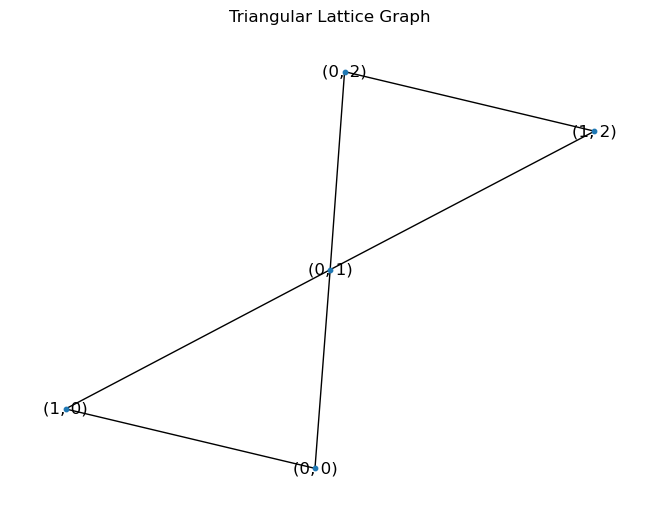

In [17]:
# Create a triangular lattice graph with 5 rows and 5 columns
rows = 2
cols = 1
graph = nx.triangular_lattice_graph(rows, cols)

# Draw the graph (optional)
nx.draw(graph, with_labels=True, node_size=10)
plt.title("Triangular Lattice Graph")
plt.show()

In [20]:
def generate_triangular_lattice_bonds(Lx, Ly, pbc=True):
    """
    Generate nearest-neighbor bonds for a triangular lattice of size Lx x Ly.

    Args:
        Lx (int): Number of sites along x.
        Ly (int): Number of sites along y.
        pbc (bool): If True, use periodic boundary conditions. If False, use open boundary conditions.

    Returns:
        bonds (list of tuples): Each tuple (i, j) represents a bond between site i and site j.
    """
    bonds = []
    
    def site_index(x, y):
        return x + y * Lx

    for y in range(Ly):
        for x in range(Lx):
            i = site_index(x, y)

            # Right neighbor
            if pbc or x + 1 < Lx:
                jx = (x + 1) % Lx
                jy = y
                j = site_index(jx, jy)
                bonds.append((i, j))

            # Up neighbor
            if pbc or y + 1 < Ly:
                jx = x
                jy = (y + 1) % Ly
                j = site_index(jx, jy)
                bonds.append((i, j))

            # Up-right neighbor (diagonal neighbor in triangular lattice)
            if pbc or (x + 1 < Lx and y + 1 < Ly):
                jx = (x + 1) % Lx
                jy = (y + 1) % Ly
                j = site_index(jx, jy)
                bonds.append((i, j))

    return bonds

In [23]:
# Example usage:

Lx, Ly = 2, 2

print("With periodic boundary conditions (PBC):")
bonds_pbc = generate_triangular_lattice_bonds(Lx, Ly, pbc=True)
for b in bonds_pbc:
    print(b)

print("\nWith open boundary conditions (OBC):")
bonds_obc = generate_triangular_lattice_bonds(Lx, Ly, pbc=False)
for b in bonds_obc:
    print(b)


With periodic boundary conditions (PBC):
(0, 1)
(0, 2)
(0, 3)
(1, 0)
(1, 3)
(1, 2)
(2, 3)
(2, 0)
(2, 1)
(3, 2)
(3, 1)
(3, 0)

With open boundary conditions (OBC):
(0, 1)
(0, 2)
(0, 3)
(1, 3)
(2, 3)


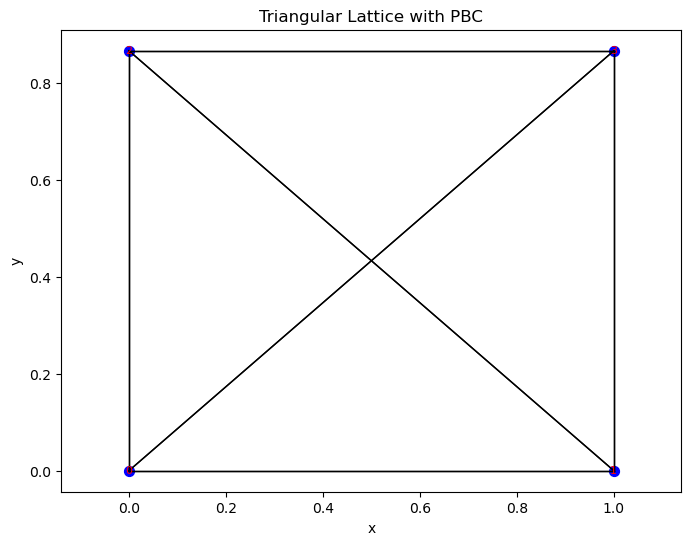

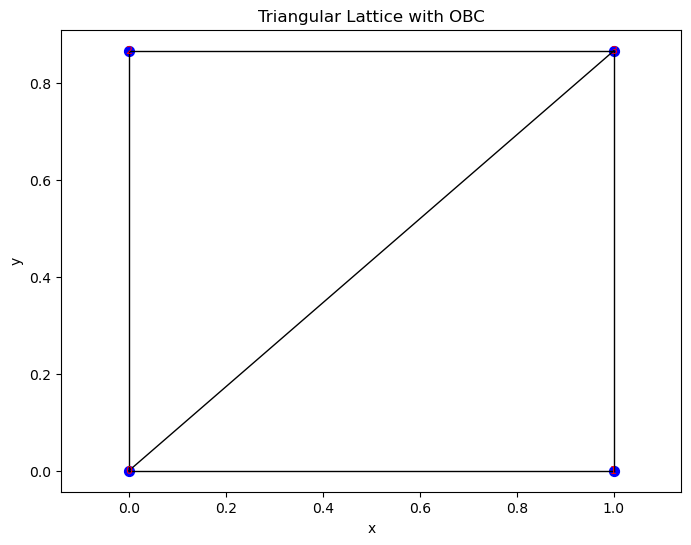

In [24]:
def visualize_triangular_lattice(Lx, Ly, bonds, title="Triangular Lattice"):
    """
    Visualize the triangular lattice on the (x, y) plane.

    Args:
        Lx (int): Number of sites along x.
        Ly (int): Number of sites along y.
        bonds (list of tuples): List of bonds (i, j) between lattice points.
        title (str): Title of the plot.
    """
    # Generate (x, y) coordinates for each site
    def site_coordinates(x, y):
        return x, y * np.sqrt(3) / 2  # Adjust y for triangular lattice spacing

    coordinates = {}
    for y in range(Ly):
        for x in range(Lx):
            coordinates[x + y * Lx] = site_coordinates(x, y)

    # Plot the lattice points
    plt.figure(figsize=(8, 6))
    for i, (x, y) in coordinates.items():
        plt.scatter(x, y, color="blue", s=50)
        plt.text(x, y, str(i), fontsize=8, ha="center", va="center", color="red")

    # Plot the bonds
    for i, j in bonds:
        x1, y1 = coordinates[i]
        x2, y2 = coordinates[j]
        plt.plot([x1, x2], [y1, y2], color="black", linewidth=1)

    # Set plot limits and title
    plt.title(title)
    plt.axis("equal")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()


# Example usage
Lx, Ly = 2, 2

# Generate bonds with periodic boundary conditions
bonds_pbc = generate_triangular_lattice_bonds(Lx, Ly, pbc=True)
visualize_triangular_lattice(Lx, Ly, bonds_pbc, title="Triangular Lattice with PBC")

# Generate bonds with open boundary conditions
bonds_obc = generate_triangular_lattice_bonds(Lx, Ly, pbc=False)
visualize_triangular_lattice(Lx, Ly, bonds_obc, title="Triangular Lattice with OBC")